In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")


In [5]:
df = pd.read_csv('/content/Spotify-2000.csv')
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


# 1. EXPLORATORY DATA ANALYSIS

In [6]:
print(f"Dataset shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"\nData types:\n{df.dtypes}")

Dataset shape: (1994, 15)
Missing values:
Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

Data types:
Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

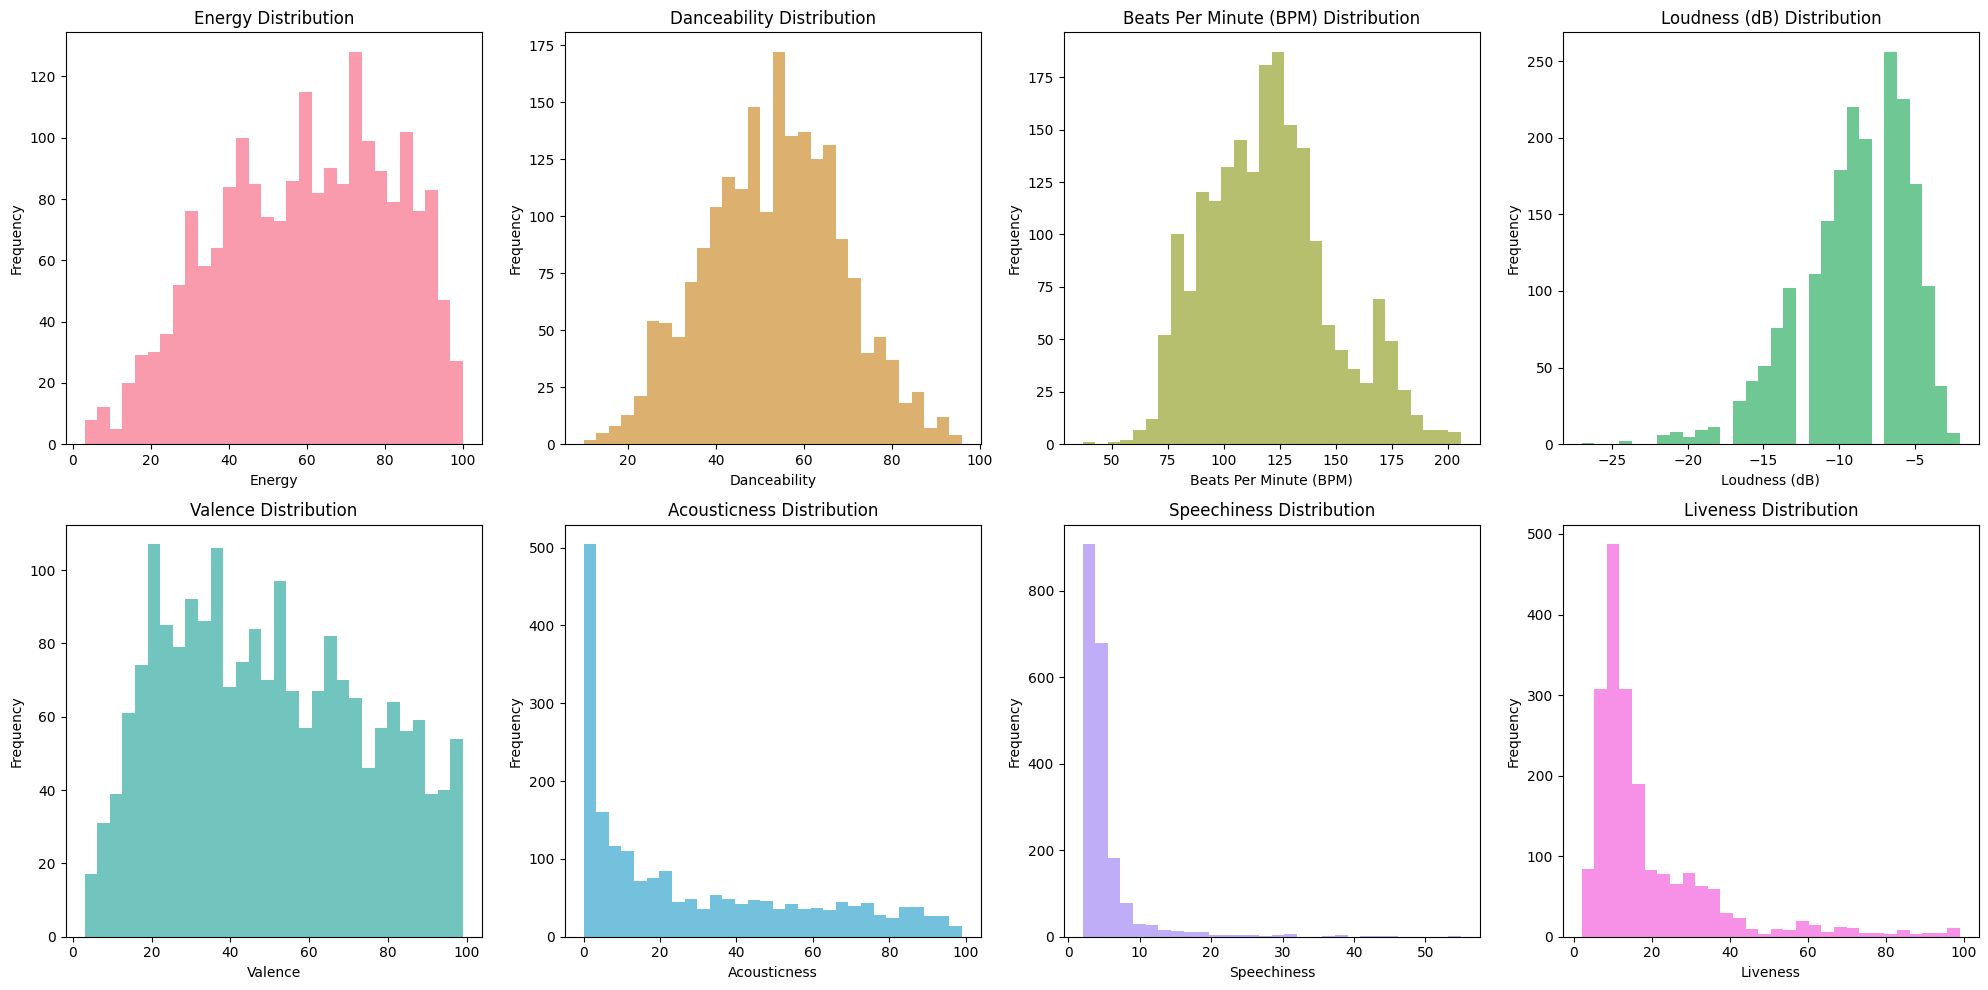

In [8]:
# Distribution plots for key audio features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
audio_features = ['Energy', 'Danceability', 'Beats Per Minute (BPM)', 'Loudness (dB)',
                  'Valence', 'Acousticness', 'Speechiness', 'Liveness']

# Use a color palette with enough colors for all features
colors = sns.color_palette('husl', len(audio_features))

for i, feature in enumerate(audio_features):
    row = i // 4
    col = i % 4
    axes[row, col].hist(df[feature], bins=30, alpha=0.7, color=colors[i])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

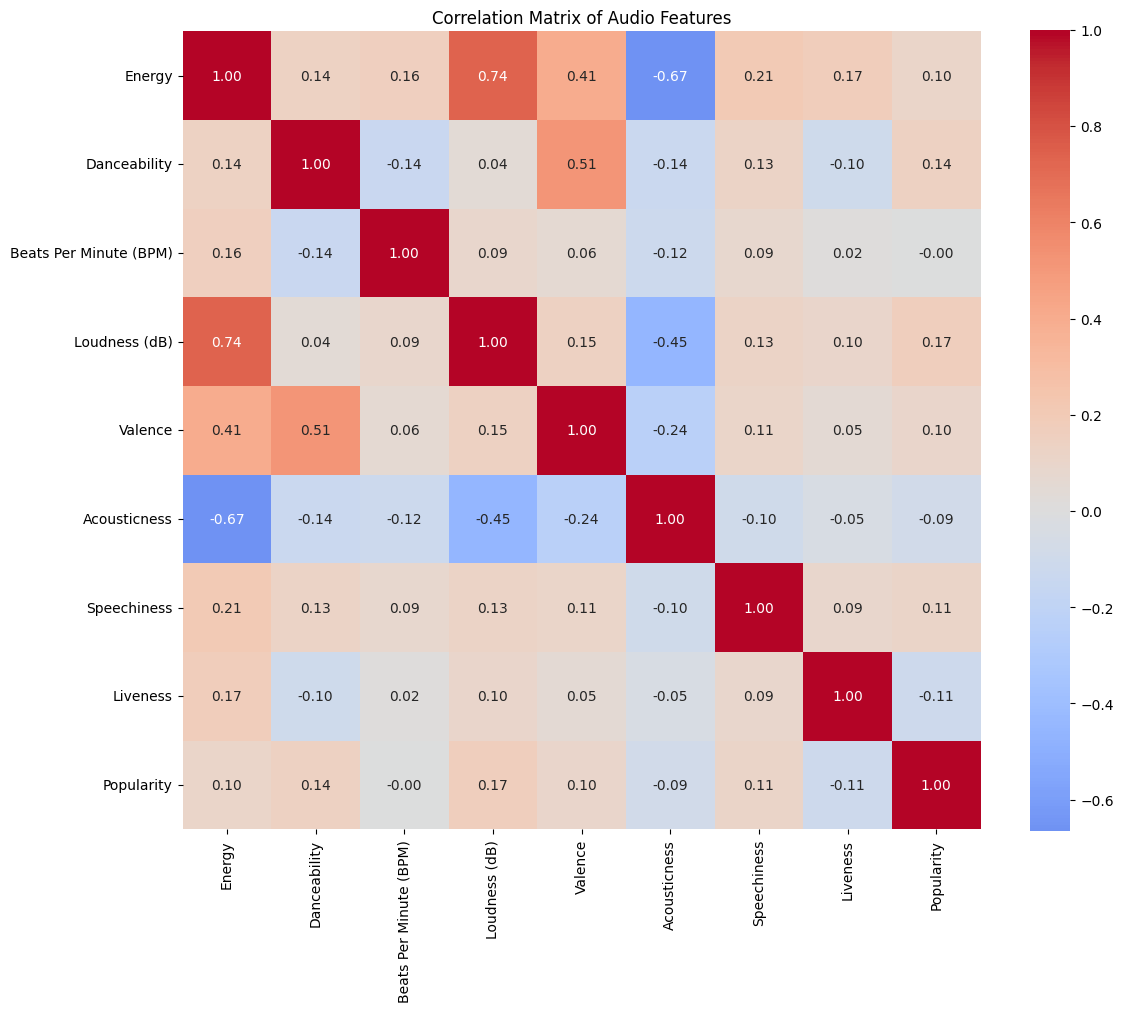

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[audio_features + ['Popularity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()


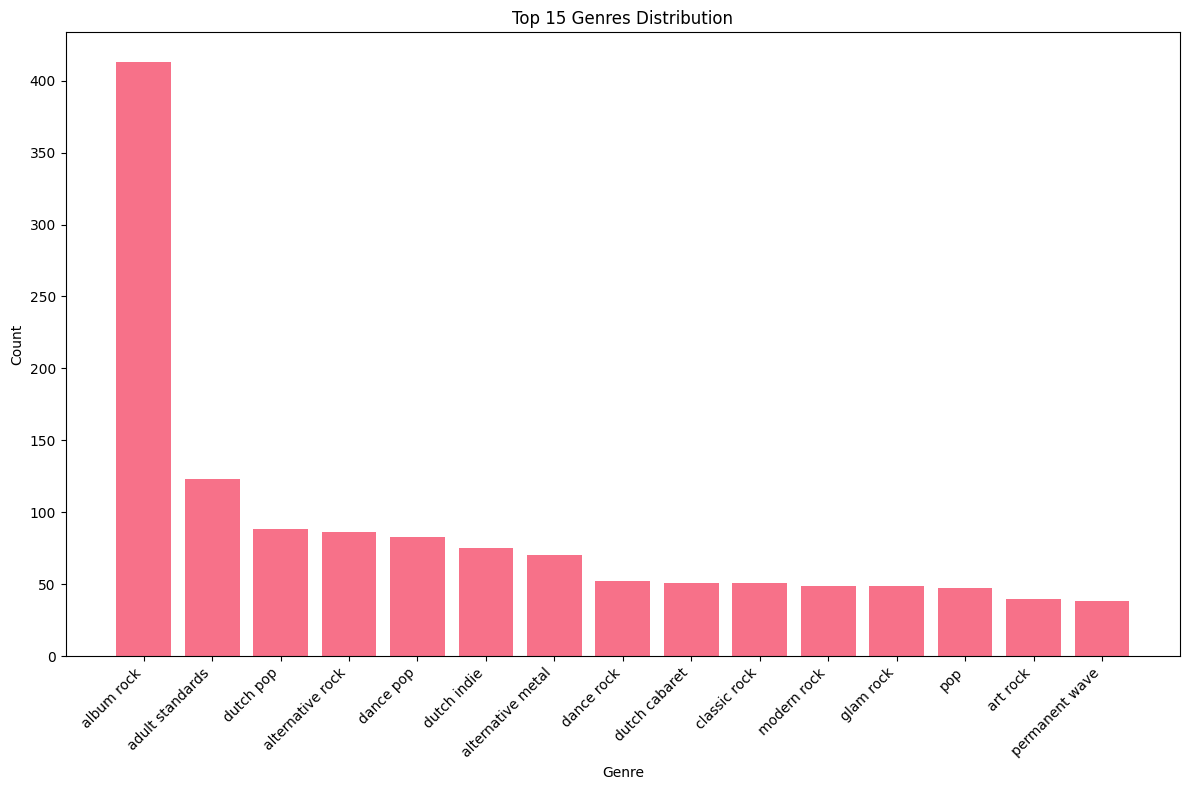

In [10]:
# Genre distribution
plt.figure(figsize=(12, 8))
genre_counts = df['Top Genre'].value_counts().head(15)
plt.bar(range(len(genre_counts)), genre_counts.values)
plt.title('Top 15 Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(range(len(genre_counts)), genre_counts.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


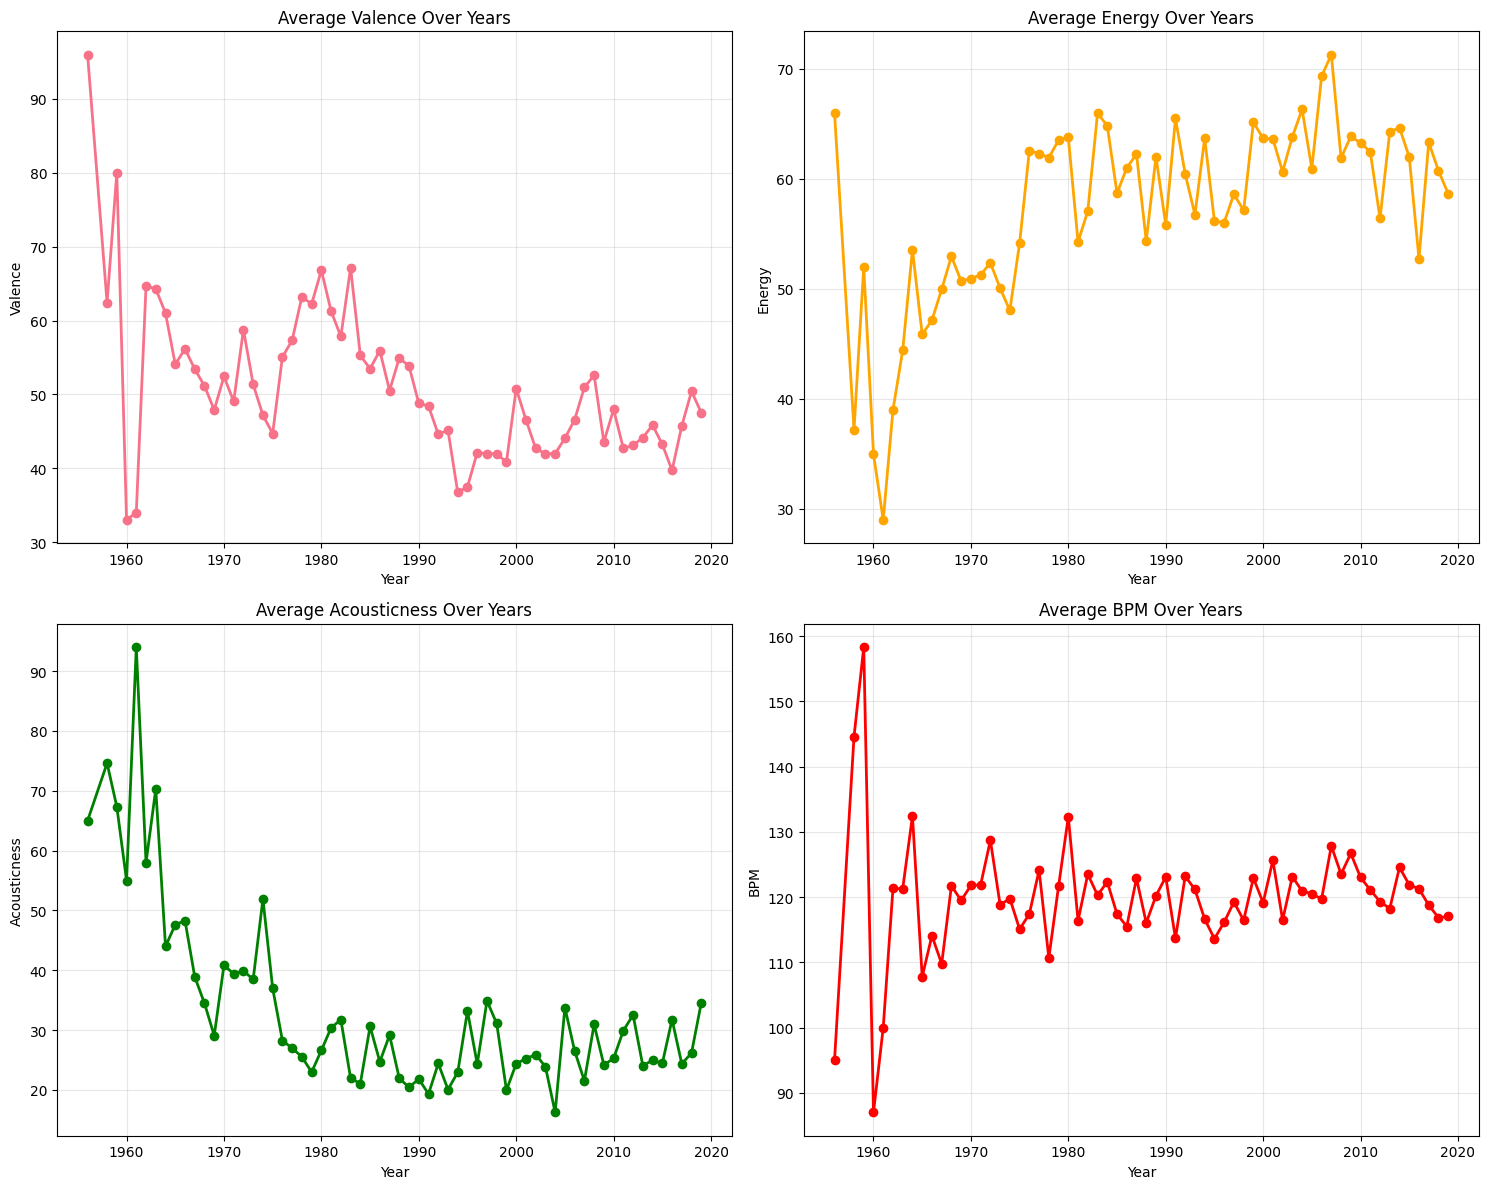

In [15]:
# Trends over time
plt.figure(figsize=(15, 12))

# Valence trend over years
plt.subplot(2, 2, 1)
yearly_valence = df.groupby('Year')['Valence'].mean()
plt.plot(yearly_valence.index, yearly_valence.values, marker='o', linewidth=2)
plt.title('Average Valence Over Years')
plt.xlabel('Year')
plt.ylabel('Valence')
plt.grid(True, alpha=0.3)

# Energy trend over years

plt.subplot(2, 2, 2)
yearly_energy = df.groupby('Year')['Energy'].mean()
plt.plot(yearly_energy.index, yearly_energy.values, marker='o', linewidth=2, color='orange')
plt.title('Average Energy Over Years')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.grid(True, alpha=0.3)

# Acousticness trend over years
plt.subplot(2, 2, 3)
yearly_acousticness = df.groupby('Year')['Acousticness'].mean()
plt.plot(yearly_acousticness.index, yearly_acousticness.values, marker='o', linewidth=2, color='green')
plt.title('Average Acousticness Over Years')
plt.xlabel('Year')
plt.ylabel('Acousticness')
plt.grid(True, alpha=0.3)

# BPM trend over years
plt.subplot(2, 2, 4)
yearly_bpm = df.groupby('Year')['Beats Per Minute (BPM)'].mean()
plt.plot(yearly_bpm.index, yearly_bpm.values, marker='o', linewidth=2, color='red')
plt.title('Average BPM Over Years')
plt.xlabel('Year')
plt.ylabel('BPM')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [16]:
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Number of unique artists: {df['Artist'].nunique()}")
print(f"Number of unique genres: {df['Top Genre'].nunique()}")



Year range: 1956 - 2019
Number of unique artists: 731
Number of unique genres: 149


#2. DATA CLEANING & PREPROCESSING

In [17]:
df_clean = df.copy()

# Convert duration to seconds if it's in MM:SS format
if df_clean['Length (Duration)'].dtype == 'object':
    try:
        df_clean['Duration_Seconds'] = df_clean['Length (Duration)'].apply(
            lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if isinstance(x, str) and ':' in x else 0
        )
    except:
        # If conversion fails, create a dummy duration
        df_clean['Duration_Seconds'] = 210

In [18]:
# Handle any missing values (though the dataset shows no nulls)
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

# Remove duplicates
initial_rows = len(df_clean)
df_clean.drop_duplicates(subset=['Title', 'Artist'], inplace=True)
print(f"Removed {initial_rows - len(df_clean)} duplicate songs")


Removed 0 duplicate songs


In [19]:
# Check for outliers using IQR method
def detect_outliers(column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)


In [20]:
# Check outliers for key features
outlier_features = ['Beats Per Minute (BPM)', 'Energy', 'Popularity']
for feature in outlier_features:
    outliers = detect_outliers(feature)
    print(f"{feature}: {outliers.sum()} outliers detected")


Beats Per Minute (BPM): 17 outliers detected
Energy: 0 outliers detected
Popularity: 9 outliers detected


In [21]:
# One-hot encode genres
genre_encoded = pd.get_dummies(df_clean['Top Genre'], prefix='Genre')
df_clean = pd.concat([df_clean, genre_encoded], axis=1)

print(f"Created {len(genre_encoded.columns)} genre dummy variables")


Created 149 genre dummy variables


#3. FEATURE SELECTION FOR SIMILARITY


In [22]:
# Select features for similarity computation
audio_features_for_similarity = [
    'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
    'Valence', 'Acousticness', 'Speechiness', 'Liveness'
]


In [24]:
# Add genre features
genre_features = [col for col in df_clean.columns if col.startswith('Genre_')]
genre_features

['Genre_acid jazz',
 'Genre_acoustic pop',
 'Genre_adult standards',
 'Genre_afropop',
 'Genre_alaska indie',
 'Genre_album rock',
 'Genre_alternative country',
 'Genre_alternative dance',
 'Genre_alternative hip hop',
 'Genre_alternative metal',
 'Genre_alternative pop',
 'Genre_alternative pop rock',
 'Genre_alternative rock',
 'Genre_arkansas country',
 'Genre_art pop',
 'Genre_art rock',
 'Genre_atl hip hop',
 'Genre_australian alternative rock',
 'Genre_australian americana',
 'Genre_australian dance',
 'Genre_australian indie folk',
 'Genre_australian pop',
 'Genre_australian psych',
 'Genre_australian rock',
 'Genre_austropop',
 'Genre_barbadian pop',
 'Genre_baroque pop',
 'Genre_basshall',
 'Genre_bebop',
 'Genre_belgian pop',
 'Genre_belgian rock',
 'Genre_big beat',
 'Genre_big room',
 'Genre_blues',
 'Genre_blues rock',
 'Genre_bow pop',
 'Genre_boy band',
 'Genre_brill building pop',
 'Genre_british alternative rock',
 'Genre_british folk',
 'Genre_british invasion',
 'Gen

In [25]:
# Add year and popularity (you can comment these out if not needed)
additional_features = ['Year', 'Popularity']


In [26]:
# Combine all features
all_features = audio_features_for_similarity + genre_features + additional_features

In [27]:
# Create feature matrix
feature_matrix = df_clean[all_features].copy()


In [28]:
# Normalize the features
scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)


In [29]:
print(f"Feature matrix shape: {feature_matrix_scaled.shape}")
print(f"Features used: {len(all_features)}")


Feature matrix shape: (1994, 159)
Features used: 159


#4. RECOMMENDATION LOGIC

In [30]:
similarity_matrix = cosine_similarity(feature_matrix_scaled)
print(f"Similarity matrix shape: {similarity_matrix.shape}")


Similarity matrix shape: (1994, 1994)


In [31]:
# Simple recommendation function
def get_song_recommendations(song_title, artist_name=None, n_recommendations=10):
    """
    Get song recommendations based on similarity
    """
    # Find the song
    if artist_name:
        song_idx = df_clean[(df_clean['Title'].str.lower() == song_title.lower()) &
                           (df_clean['Artist'].str.lower() == artist_name.lower())].index
    else:
        song_idx = df_clean[df_clean['Title'].str.lower() == song_title.lower()].index

    if len(song_idx) == 0:
        return f"Song '{song_title}' not found in the dataset"

    # Get the first match if multiple songs with same title
    song_idx = song_idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(similarity_matrix[song_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar songs (excluding the song itself)
    similar_songs = sim_scores[1:n_recommendations+1]

    # Get song details
    recommendations = []
    for idx, score in similar_songs:
        song_info = {
            'Title': df_clean.iloc[idx]['Title'],
            'Artist': df_clean.iloc[idx]['Artist'],
            'Genre': df_clean.iloc[idx]['Top Genre'],
            'Year': df_clean.iloc[idx]['Year'],
            'Similarity': round(score, 4),
            'Energy': df_clean.iloc[idx]['Energy'],
            'Danceability': df_clean.iloc[idx]['Danceability'],
            'Valence': df_clean.iloc[idx]['Valence']
        }
        recommendations.append(song_info)

    return pd.DataFrame(recommendations)


#5. TESTING THE RECOMMENDATION SYSTEM

In [32]:
# Test with a few sample songs
sample_songs = df_clean[['Title', 'Artist', 'Top Genre']].head(5)
print("Sample songs for testing:")
print(sample_songs.to_string(index=False))


Sample songs for testing:
                 Title            Artist           Top Genre
               Sunrise       Norah Jones     adult standards
           Black Night       Deep Purple          album rock
        Clint Eastwood          Gorillaz alternative hip hop
         The Pretender      Foo Fighters   alternative metal
Waitin' On A Sunny Day Bruce Springsteen        classic rock


In [33]:
# Get recommendations for the first song
first_song = df_clean.iloc[0]
print(f"\nGetting recommendations for: '{first_song['Title']}' by {first_song['Artist']}")
recommendations = get_song_recommendations(first_song['Title'], first_song['Artist'])
print(recommendations.to_string(index=False))



Getting recommendations for: 'Sunrise' by Norah Jones
                                            Title        Artist           Genre  Year  Similarity  Energy  Danceability  Valence
                                             Home Michael Bublé adult standards  2005      0.9004      37            61       35
                                 Top Of The World    Carpenters adult standards  1972      0.8940      34            38       69
                              You've Got a Friend   Carole King adult standards  1971      0.8938      26            47       46
                                 Time In A Bottle     Jim Croce adult standards  1972      0.8918      26            54       64
                      Take Me Home, Country Roads   John Denver adult standards  1997      0.8872      43            26       55
                                         Songbird   Eva Cassidy adult standards  1997      0.8820      23            38       15
Leaving, On a Jet Plane - "Greatest Hits" 

#6. OPTIONAL FILTERS

In [34]:
def get_filtered_recommendations(song_title, artist_name=None, n_recommendations=10,
                               same_genre=False, year_range=None, min_popularity=None):
    """
    Get filtered recommendations
    """
    # Find the original song
    if artist_name:
        song_idx = df_clean[(df_clean['Title'].str.lower() == song_title.lower()) &
                           (df_clean['Artist'].str.lower() == artist_name.lower())].index
    else:
        song_idx = df_clean[df_clean['Title'].str.lower() == song_title.lower()].index

    if len(song_idx) == 0:
        return f"Song '{song_title}' not found in the dataset"

    song_idx = song_idx[0]
    original_song = df_clean.iloc[song_idx]

    # Get similarity scores
    sim_scores = list(enumerate(similarity_matrix[song_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Apply filters
    filtered_songs = []
    for idx, score in sim_scores[1:]:  # Skip the original song
        candidate = df_clean.iloc[idx]

        # Genre filter
        if same_genre and candidate['Top Genre'] != original_song['Top Genre']:
            continue

        # Year range filter
        if year_range:
            if candidate['Year'] < year_range[0] or candidate['Year'] > year_range[1]:
                continue

        # Popularity filter
        if min_popularity and candidate['Popularity'] < min_popularity:
            continue

        filtered_songs.append((idx, score))

        if len(filtered_songs) >= n_recommendations:
            break

    # Create recommendations dataframe
    recommendations = []
    for idx, score in filtered_songs:
        song_info = {
            'Title': df_clean.iloc[idx]['Title'],
            'Artist': df_clean.iloc[idx]['Artist'],
            'Genre': df_clean.iloc[idx]['Top Genre'],
            'Year': df_clean.iloc[idx]['Year'],
            'Similarity': round(score, 4),
            'Popularity': df_clean.iloc[idx]['Popularity'],
            'Energy': df_clean.iloc[idx]['Energy'],
            'Danceability': df_clean.iloc[idx]['Danceability'],
            'Valence': df_clean.iloc[idx]['Valence']
        }
        recommendations.append(song_info)

    return pd.DataFrame(recommendations)


In [35]:
# Test filtered recommendations
print(f"\nFiltered recommendations (same genre) for: '{first_song['Title']}'")



Filtered recommendations (same genre) for: 'Sunrise'


In [36]:
filtered_recs = get_filtered_recommendations(first_song['Title'], first_song['Artist'],
                                           same_genre=True, n_recommendations=5)
print(filtered_recs.to_string(index=False))


                      Title        Artist           Genre  Year  Similarity  Popularity  Energy  Danceability  Valence
                       Home Michael Bublé adult standards  2005      0.9004          64      37            61       35
           Top Of The World    Carpenters adult standards  1972      0.8940          65      34            38       69
        You've Got a Friend   Carole King adult standards  1971      0.8938          68      26            47       46
           Time In A Bottle     Jim Croce adult standards  1972      0.8918          58      26            54       64
Take Me Home, Country Roads   John Denver adult standards  1997      0.8872          77      43            26       55


#7. OPTIONAL ENHANCEMENTS - CLUSTERING

In [40]:
# Perform K-means clustering to group songs by mood
print(" Finding optimal number of clusters using Elbow Method...")
inertias = []
silhouette_scores = []
k_range = range(2, 16)


from sklearn.metrics import silhouette_score

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(feature_matrix_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(feature_matrix_scaled, kmeans_temp.labels_))



 Finding optimal number of clusters using Elbow Method...


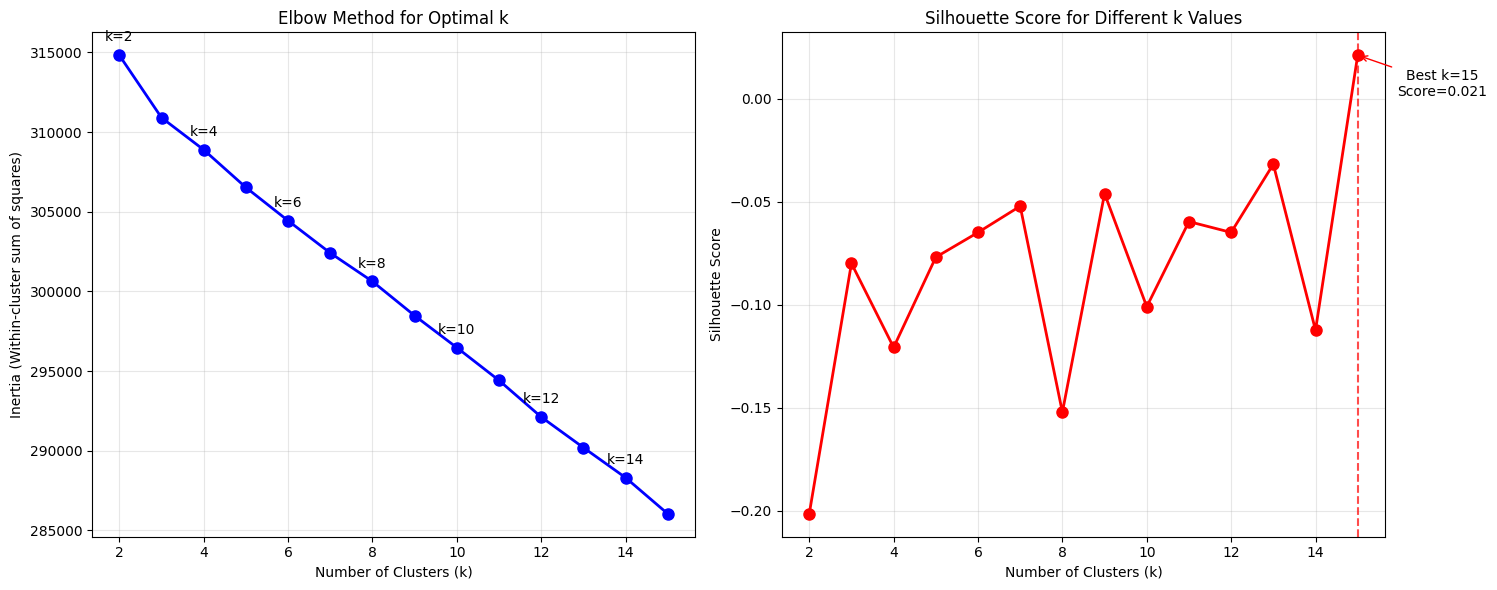

In [41]:
# Plot Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Add annotations for potential elbow points
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    if i % 2 == 0:  # Annotate every other point to avoid clutter
        ax1.annotate(f'k={k}', (k, inertia), textcoords="offset points",
                    xytext=(0,10), ha='center')

# Silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k Values')
ax2.grid(True, alpha=0.3)

# Find and mark the best silhouette score
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)
ax2.axvline(x=best_k_silhouette, color='red', linestyle='--', alpha=0.7)
ax2.annotate(f'Best k={best_k_silhouette}\nScore={best_silhouette_score:.3f}',
            xy=(best_k_silhouette, best_silhouette_score),
            xytext=(best_k_silhouette+2, best_silhouette_score-0.02),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, ha='center')

plt.tight_layout()
plt.show()



In [42]:
def find_elbow_point(k_values, inertias):
    # Normalize the data
    k_norm = np.array(k_values) / max(k_values)
    inertia_norm = np.array(inertias) / max(inertias)

    # Calculate distances from each point to the line connecting first and last points
    distances = []
    for i in range(len(k_norm)):
        # Line from first to last point
        x1, y1 = k_norm[0], inertia_norm[0]
        x2, y2 = k_norm[-1], inertia_norm[-1]

        # Current point
        x0, y0 = k_norm[i], inertia_norm[i]

        # Distance from point to line
        distance = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1) / np.sqrt((y2-y1)**2 + (x2-x1)**2)
        distances.append(distance)

    # Find the point with maximum distance (elbow point)
    elbow_index = np.argmax(distances)
    return k_values[elbow_index]



In [43]:
optimal_k_elbow = find_elbow_point(list(k_range), inertias)

print(f"Clustering Analysis Results:")
print(f"   • Optimal k (Elbow Method): {optimal_k_elbow}")
print(f"   • Optimal k (Silhouette Score): {best_k_silhouette}")
print(f"   • Best Silhouette Score: {best_silhouette_score:.3f}")


Clustering Analysis Results:
   • Optimal k (Elbow Method): 3
   • Optimal k (Silhouette Score): 15
   • Best Silhouette Score: 0.021


In [44]:
print(f"\n Inertia values for different k:")
for k, inertia in zip(k_range, inertias):
    print(f"   k={k}: {inertia:.2f}")



 Inertia values for different k:
   k=2: 314826.01
   k=3: 310910.19
   k=4: 308892.84
   k=5: 306530.84
   k=6: 304443.30
   k=7: 302417.04
   k=8: 300630.15
   k=9: 298483.19
   k=10: 296478.19
   k=11: 294419.82
   k=12: 292124.24
   k=13: 290203.96
   k=14: 288316.95
   k=15: 286047.72


In [46]:
if best_silhouette_score > 0.3:  # Good silhouette score threshold
    n_clusters = best_k_silhouette
    print(f"\nUsing k={n_clusters} based on silhouette score")
else:
    n_clusters = optimal_k_elbow
    print(f"\nUsing k={n_clusters} based on elbow method")



Using k=3 based on elbow method


In [47]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_clean['Mood_Cluster'] = kmeans.fit_predict(feature_matrix_scaled)


In [48]:
print(f"\n Created {n_clusters} mood clusters for {len(df_clean)} songs")



 Created 3 mood clusters for 1994 songs


In [49]:
print("Cluster analysis:")
for i in range(n_clusters):
    cluster_songs = df_clean[df_clean['Mood_Cluster'] == i]
    cluster_features = cluster_songs[audio_features_for_similarity].mean()
    print(f"\nCluster {i} ({len(cluster_songs)} songs):")
    print(f"  Avg Energy: {cluster_features['Energy']:.2f}")
    print(f"  Avg Valence: {cluster_features['Valence']:.2f}")
    print(f"  Avg Danceability: {cluster_features['Danceability']:.2f}")
    print(f"  Most common genre: {cluster_songs['Top Genre'].mode().iloc[0]}")


Cluster analysis:

Cluster 0 (1118 songs):
  Avg Energy: 74.31
  Avg Valence: 56.77
  Avg Danceability: 56.18
  Most common genre: album rock

Cluster 1 (34 songs):
  Avg Energy: 67.41
  Avg Valence: 42.18
  Avg Danceability: 47.41
  Most common genre: irish rock

Cluster 2 (842 songs):
  Avg Energy: 39.94
  Avg Valence: 39.93
  Avg Danceability: 49.57
  Most common genre: album rock


#8. VISUALIZING SONG CLUSTERS

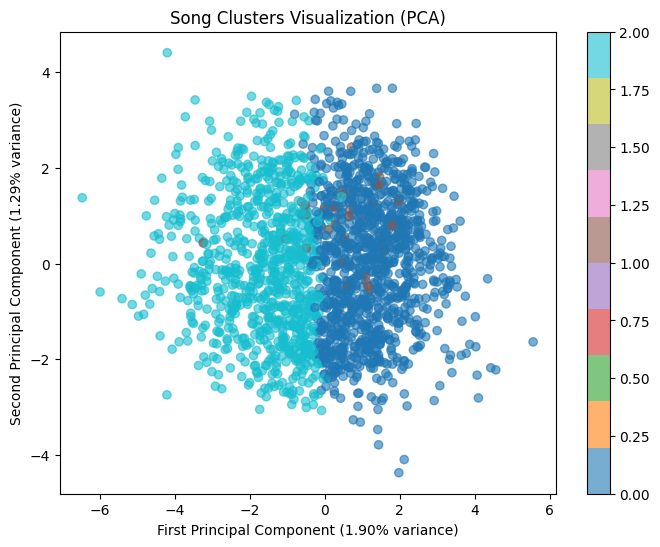

In [52]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(feature_matrix_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1],
                     c=df_clean['Mood_Cluster'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title('Song Clusters Visualization (PCA)')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.show()


# 9. USER INTERACTION EXAMPLE

In [53]:
def interactive_recommendation():
    """
    Interactive recommendation function
    """
    print("Available songs (first 10):")
    sample_df = df_clean[['Title', 'Artist', 'Top Genre', 'Year']].head(10)
    for i, row in sample_df.iterrows():
        print(f"{i}: {row['Title']} by {row['Artist']} ({row['Year']})")

    print("\nRecommendation System Ready!")
    print("Use get_song_recommendations(song_title, artist_name) to get recommendations")
    print("Use get_filtered_recommendations() for filtered results")


In [54]:
interactive_recommendation()


Available songs (first 10):
0: Sunrise by Norah Jones (2004)
1: Black Night by Deep Purple (2000)
2: Clint Eastwood by Gorillaz (2001)
3: The Pretender by Foo Fighters (2007)
4: Waitin' On A Sunny Day by Bruce Springsteen (2002)
5: The Road Ahead (Miles Of The Unknown) by City To City (2004)
6: She Will Be Loved by Maroon 5 (2002)
7: Knights of Cydonia by Muse (2006)
8: Mr. Brightside by The Killers (2004)
9: Without Me by Eminem (2002)

Recommendation System Ready!
Use get_song_recommendations(song_title, artist_name) to get recommendations
Use get_filtered_recommendations() for filtered results


#10. BONUS FEATURES

In [55]:
# Feature importance analysis
def analyze_feature_importance():
    """
    Analyze which features contribute most to similarity
    """
    # Calculate feature variance after scaling
    feature_names = all_features
    feature_importance = np.var(feature_matrix_scaled, axis=0)

    # Create importance dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.title('Top 15 Feature Importance for Similarity')
    plt.xlabel('Variance (Importance)')
    plt.tight_layout()
    plt.show()

    return importance_df


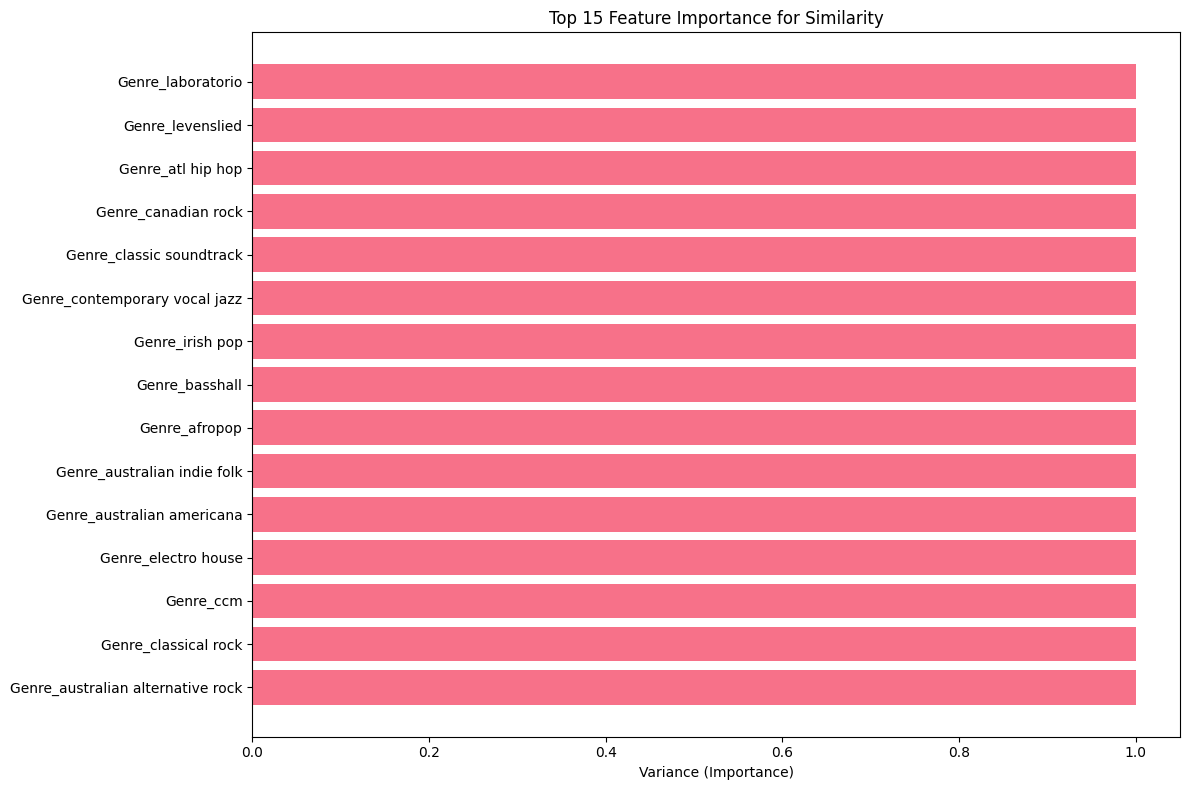

Top 10 most important features:
                          Feature  Importance
Genre_australian alternative rock         1.0
             Genre_classical rock         1.0
                        Genre_ccm         1.0
              Genre_electro house         1.0
       Genre_australian americana         1.0
      Genre_australian indie folk         1.0
                    Genre_afropop         1.0
                   Genre_basshall         1.0
                  Genre_irish pop         1.0
    Genre_contemporary vocal jazz         1.0


In [56]:
importance_df = analyze_feature_importance()
print("Top 10 most important features:")
print(importance_df.head(10).to_string(index=False))


In [57]:
# Advanced recommendation with mood matching
def get_mood_based_recommendations(song_title, artist_name=None, n_recommendations=10):
    # Find the song
    if artist_name:
        song_idx = df_clean[(df_clean['Title'].str.lower() == song_title.lower()) &
                           (df_clean['Artist'].str.lower() == artist_name.lower())].index
    else:
        song_idx = df_clean[df_clean['Title'].str.lower() == song_title.lower()].index

    if len(song_idx) == 0:
        return f"Song '{song_title}' not found in the dataset"

    song_idx = song_idx[0]
    original_mood = df_clean.iloc[song_idx]['Mood_Cluster']

    # Get songs from the same mood cluster
    same_mood_songs = df_clean[df_clean['Mood_Cluster'] == original_mood]

    # Get similarity scores only for songs in the same mood
    mood_indices = same_mood_songs.index.tolist()
    mood_similarities = []

    for idx in mood_indices:
        if idx != song_idx:  # Exclude the original song
            similarity = similarity_matrix[song_idx][idx]
            mood_similarities.append((idx, similarity))

    # Sort by similarity
    mood_similarities.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_recommendations = mood_similarities[:n_recommendations]

    # Create recommendations dataframe
    recommendations = []
    for idx, score in top_recommendations:
        song_info = {
            'Title': df_clean.iloc[idx]['Title'],
            'Artist': df_clean.iloc[idx]['Artist'],
            'Genre': df_clean.iloc[idx]['Top Genre'],
            'Year': df_clean.iloc[idx]['Year'],
            'Mood_Cluster': df_clean.iloc[idx]['Mood_Cluster'],
            'Similarity': round(score, 4),
            'Energy': df_clean.iloc[idx]['Energy'],
            'Danceability': df_clean.iloc[idx]['Danceability'],
            'Valence': df_clean.iloc[idx]['Valence']
        }
        recommendations.append(song_info)

    return pd.DataFrame(recommendations)


In [58]:
# Test mood-based recommendations
print(f"\nMood-based recommendations for: '{first_song['Title']}'")
mood_recs = get_mood_based_recommendations(first_song['Title'], first_song['Artist'])
print(mood_recs.to_string(index=False))



Mood-based recommendations for: 'Sunrise'
                                            Title        Artist           Genre  Year  Mood_Cluster  Similarity  Energy  Danceability  Valence
                                             Home Michael Bublé adult standards  2005             2      0.9004      37            61       35
                                 Top Of The World    Carpenters adult standards  1972             2      0.8940      34            38       69
                              You've Got a Friend   Carole King adult standards  1971             2      0.8938      26            47       46
                                 Time In A Bottle     Jim Croce adult standards  1972             2      0.8918      26            54       64
                      Take Me Home, Country Roads   John Denver adult standards  1997             2      0.8872      43            26       55
                                         Songbird   Eva Cassidy adult standards  1997             2

- Built a scalable, content-based song recommendation system using cosine similarity on normalized audio features and genre metadata, with enhanced filtering through mood-based clustering using KMeans, and feature importance analysis for interpretability.

